In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
#importing the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(url)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#identify the columns name
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [4]:
#identify the datatype for each column
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [11]:
#because the date is categorized as object, we will convert it
import datetime as dt
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


# TASK 1 : CREATE A VISUALIZATION BASED ON THE CASE

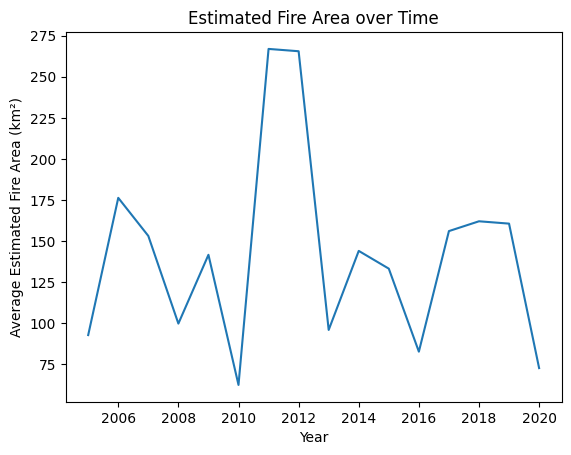

In [6]:
#Task 1 : the change in average estimated fire area over time
dfFire = df.groupby('Year')['Estimated_fire_area'].mean()
dfFire.plot(x = dfFire.index, y = dfFire.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

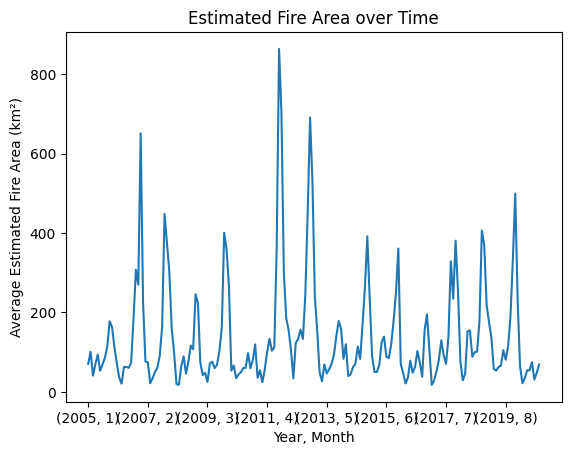

In [13]:
#Task 2. The Estimated Fire Area for Year Grouped together with month
df1 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df1.plot(x = df1.index, y = df1.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

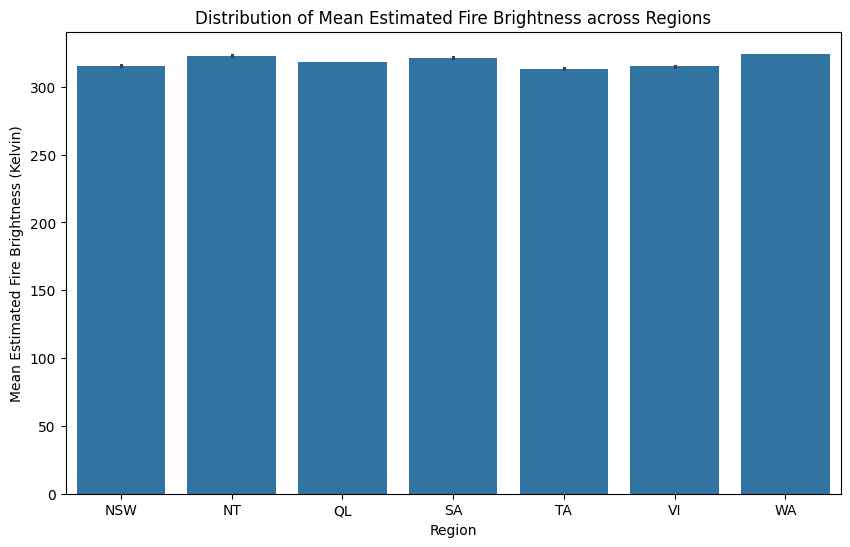

In [15]:
#Task 3. Distribution of mean estimated fire brightness across the regions
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Region', y = 'Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

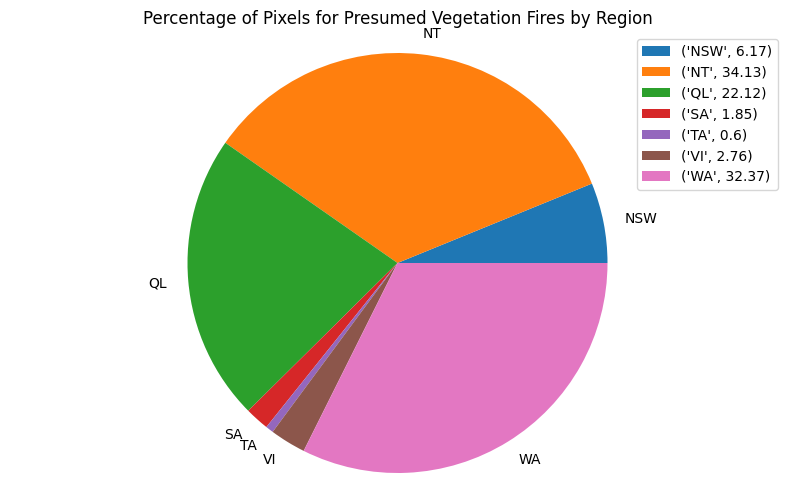

In [29]:
#Task 4. The portion of count of pixel for presumed vegetation fires vary across regions
plt.figure(figsize = (10,6))
dfCount = df.groupby('Region')['Count'].sum()

plt.pie(dfCount, labels = dfCount.index)
plt.legend([(i,round(k/dfCount.sum()*100,2)) for i,k in zip(dfCount.index, dfCount)])
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

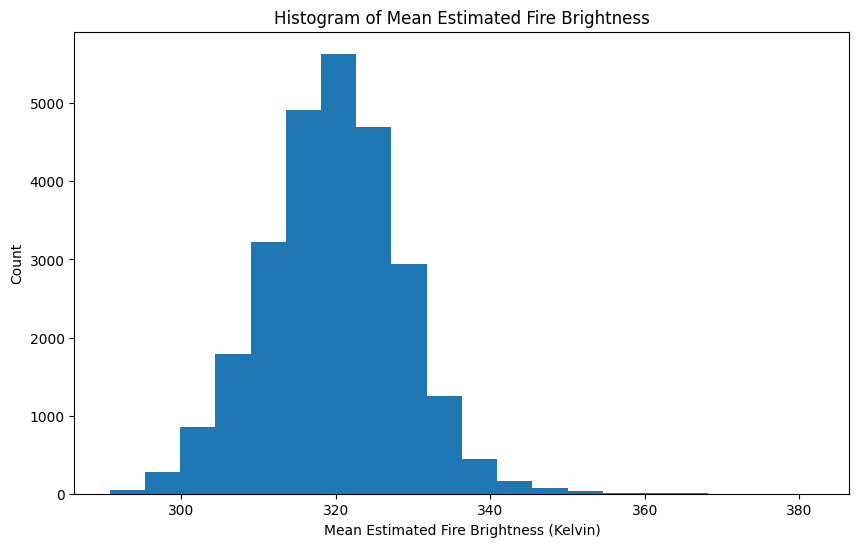

In [32]:
#Task 5. Develop histograf of the mean estimated fire brightness
plt.figure(figsize=(10,6))
plt.hist(x = df['Mean_estimated_fire_brightness'], bins = 20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

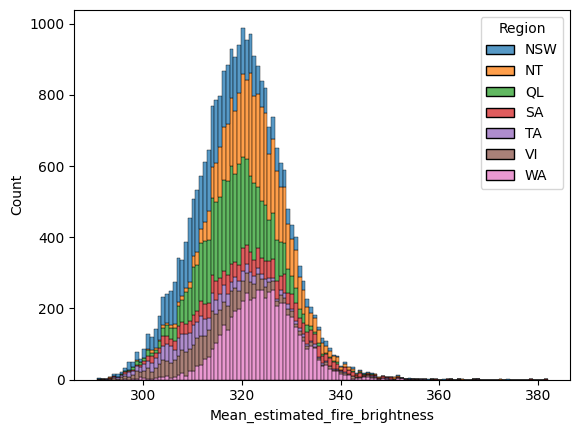

In [34]:
#Task 6. The distribution of estimated fire brightness across regions
sns.histplot(data = df, x = 'Mean_estimated_fire_brightness', hue = 'Region', multiple = 'stack')
plt.show()

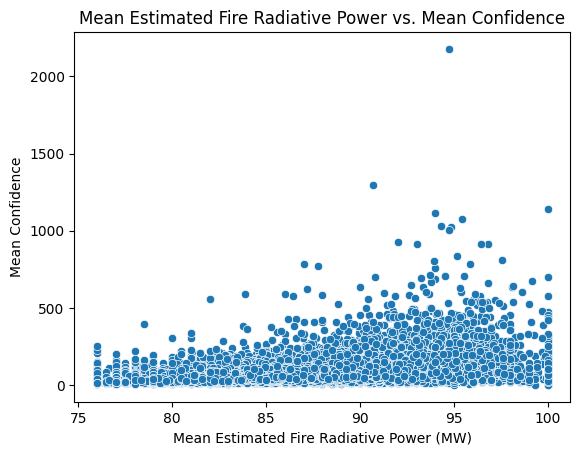

In [35]:
#Task 7. The correlation between mean estimated fire radiative power and mean confidence level
sns.scatterplot(data = df, x = 'Mean_confidence', y = 'Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [43]:
#Mark seven regions on the map of australia using the folium
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)

import folium
#create a folium map centered on Australia
ausMap = folium.Map(location = [-25,135], zoom_start = 4)
#Instantiate a feature group
maps = folium.map.FeatureGroup()

#loop through the region n add to feature group
for lat,lon in zip(reg.Lat, reg.Lon):
  maps.add_child(
      folium.vector_layers.CircleMarker(
          [lat,lon],
          radius = 5,
          color = 'red',
          fill = True,
          fill_color = 'white'
      )
  )

#add the region name as the label on the map's coordinates
lat = list(reg.Lat)
lon = list(reg.Lon)
label = list(reg.region)

for latt, lonn, labell in zip(lat,lon, label):
  folium.Marker([latt,lonn], popup = labell).add_to(ausMap)

ausMap.add_child(maps)

# TASK 2 : CREATE A DASH TO VISUALIZE INTERACTIVELY

In [62]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

#create the base apps
app = dash.Dash(__name__)

#clear the layout and dont display exception till callbacks get executed
app.config.suppress_callback_exceptions = True

#read the data to pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

#extract year and month from the column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name() #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year

#Layout section of dash
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),

     #outer division starts
     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),
                    #Radio items to select the region
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                            dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),

         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([
                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),
    ])
    #outer division ends
])
#layout ends

#Add the output and input components
@app.callback(
    [Output(component_id='plot1', component_property='children'),
     Output(component_id='plot2', component_property='children')],

    [Input(component_id='region', component_property='value'),
     Input(component_id='year', component_property='value')]
)

#add the callback function
def regDisplay(inpReg, inpYear):
  regDf = df[df['Region'] == inpReg]
  yearDf = regDf[regDf['Year'] == inpYear]

  #1st Plot. Monthly Average Estimated Fire Area
  estData = yearDf.groupby('Month')['Estimated_fire_area'].mean().reset_index()
  fig1 = px.pie(estData, values = 'Estimated_fire_area', names = 'Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(inpReg,inpYear))

  #2nd Plot. Monthly Average Count of Pixels for Presumed Vegetation Fires
  vegData = yearDf.groupby('Month')['Count'].mean().reset_index()
  fig2 = px.bar(vegData, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(inpReg,inpYear))

  return [dcc.Graph(figure = fig1), dcc.Graph(figure = fig2)]

if __name__ == '__main__':
  app.run_server()

<IPython.core.display.Javascript object>